In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Pandasdata\\DT_files\\space.csv")

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [5]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
df['objid'].value_counts()

1.237650e+18    10000
Name: objid, dtype: int64

In [7]:
for cols in df.columns:
    if df[cols].dtypes =='object':
        print("Column Name is {} and  no of Unique values are {}".format(cols, len(df[cols].value_counts())))
        print()

Column Name is class and  no of Unique values are 3



In [8]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64



In [9]:
for col in df.columns:
    if df[col].dtype=="float64":
        print(df[col].value_counts())
        print()

1.237650e+18    10000
Name: objid, dtype: int64

226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64

 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64

18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64

17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64

15.99986    3
16.48978    3
16.70929    2
17.21182    2
16.27899    2
           ..
19.18255    1
16.03177    1
16.27091    1
17.45321    

In [10]:
df_corr=df.corr()

In [11]:
# As there is no variance in ObjID let us remove it
df.drop('objid',axis=1,inplace= True)

In [12]:
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [13]:
df['rerun'].unique()

array([301], dtype=int64)

In [14]:
df.drop('rerun',axis=1,inplace=True)

In [15]:
df['specobjid'].unique()

array([3.72236e+18, 3.63814e+17, 3.23274e+17, ..., 5.03345e+17,
       5.03340e+17, 5.03341e+17])

In [16]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [17]:
df['run'].unique()

array([ 752,  756,  308,  727,  745, 1035, 1045, 1140, 1231, 1332, 1334,
       1302, 1239, 1119, 1331, 1345, 1350, 1404, 1412, 1336, 1402, 1411,
       1356], dtype=int64)

In [22]:
# run, camcol, field an be removed.
#The features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation
#We will drop these columns as any correlation to the outcome would be coincidentally.

In [23]:
df.drop('run',axis=1,inplace=True)

In [24]:
df.drop('camcol',axis=1,inplace=True)

In [25]:
df.drop('field',axis=1,inplace=True)

In [26]:
df.head()

,ra,dec,u,g,r,i,z,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,3.722370e+18,STAR,0.000590,3306,54922,512


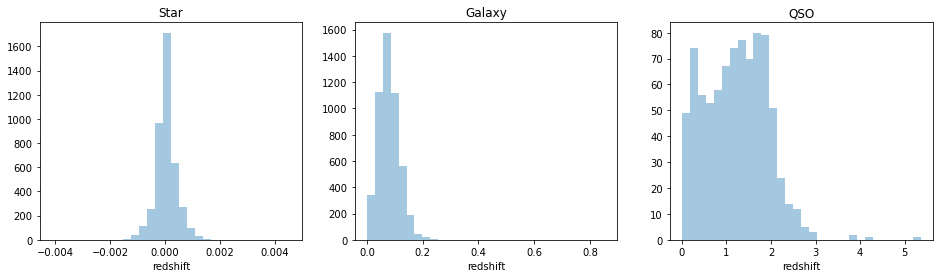

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

In [ ]:
# we can see that there is a clear difference in redshift values for each classes.


In [29]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [18]:
df_corr=df.corr()

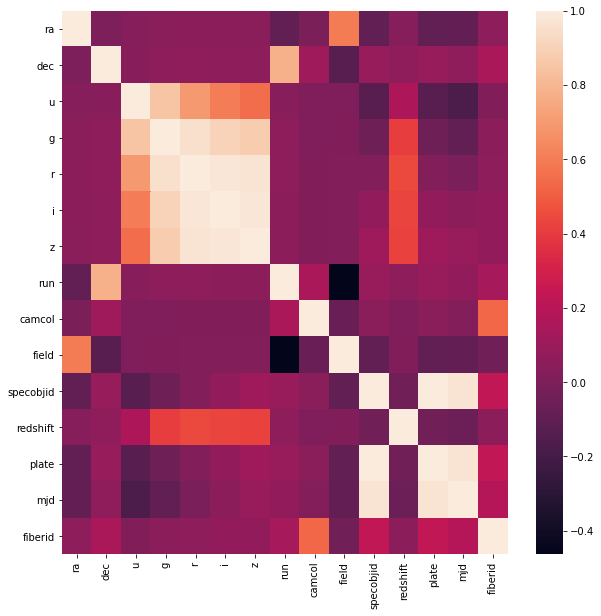

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr)

In [28]:
# u,g,r,i,z correlate with each other.. We will transform them in to 3 dimensions using PCA

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
df_save=df


In [31]:
df_save.head()

,ra,dec,u,g,r,i,z,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,3.722370e+18,2,0.000590,3306,54922,512


In [33]:
tran=pca.fit_transform(df_save[['u','g','r','i','z']])

In [34]:
df_save=pd.concat((df_save,pd.DataFrame(tran)),axis=1)
df_save.rename({0:'PCA_1',1:'PCA_2',2:'PCA_3'},axis=1,inplace=True)

In [35]:
df_save.drop(['u','g','r','i','z'],axis=1,inplace=True)

In [36]:
df_save.head()

,ra,dec,specobjid,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,3.722360e+18,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,3.638140e+17,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,3.232740e+17,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,3.722370e+18,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,3.722370e+18,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


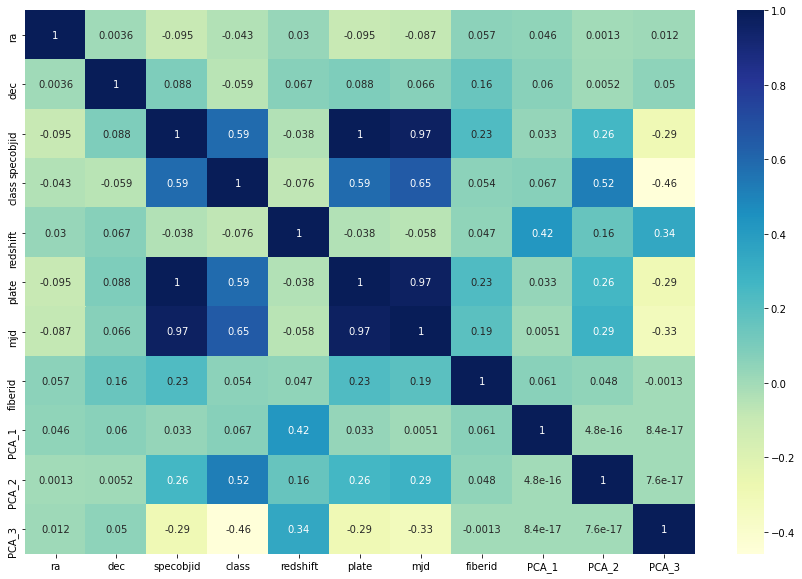

In [39]:
df_corr=df_save.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,cmap='YlGnBu',annot=True)

In [40]:
# spacebjid and plate are having high correlation with each other so let us drop spaceobjid
df_save.drop('specobjid',axis=1,inplace=True)

In [41]:
df_save.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [42]:
x=df_save.drop('class',axis=1)

In [44]:
y=df_save['class']

In [45]:
x.shape

(10000, 9)

In [46]:
y.shape

(10000,)

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [48]:
x

array([[ 0.16745842, -0.58492272, -0.36973112, ..., -0.67819871,
        -1.99015818, -1.67472653],
       [ 0.16886159, -0.58311429, -0.36984929, ..., -0.0880854 ,
        -0.04105251, -0.9835123 ],
       [ 0.17057433, -0.58347525, -0.05302706, ...,  0.58388549,
        -0.85257048,  0.88650349],
       ...,
       [-0.92039468,  1.46090664, -0.37074104, ...,  0.6662847 ,
         0.56168764, -0.80001147],
       [-0.92197294,  1.46432109, -0.33364691, ...,  0.62640058,
         0.16906767,  0.24521107],
       [-0.91804124,  1.46639319, -0.06510125, ..., -0.42126595,
        -1.60857083, -0.00713518]])

### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.33)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.9875757575757576


In [56]:
f1_score(y_test,y_pred, average='weighted')

0.9876091564824728

In [59]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
class,,,
0,1611,15,7
1,10,310,0
2,7,2,1338


In [60]:
# let us use SMOTE and check if we can inc the accuracy

In [61]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [62]:
x_train_smote,y_train_smote=smote.fit_sample(x_train,y_train)

In [63]:
dtc.fit(x_train_smote,y_train_smote)
y_pred=dtc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.9881818181818182


In [66]:
# slight improvement in accuracy

In [64]:
f1_score(y_test,y_pred, average='weighted')

0.9882544585127868

In [65]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
class,,,
0,1606,20,7
1,7,313,0
2,3,2,1342


### Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.993030303030303


In [102]:
f1_score(y_test,y_pred, average='weighted')

0.9930292577843188

In [103]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
class,,,
0,1618,7,8
1,6,314,0
2,2,0,1345


### KNeighborsClassifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.96


In [79]:
f1_score(y_test,y_pred, average='weighted')

0.9599953717254054

### Support Vector Classifier

In [104]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=1000)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.9918181818181818


In [105]:
f1_score(y_test,y_pred, average='weighted')

0.9917970276713618

In [107]:
#using Smote 

In [106]:
svc.fit(x_train_smote,y_train_smote)
y_pred=svc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.990909090909091


### Bagging Classifier

In [99]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier(max_samples=0.7,max_features=0.6)
bgc.fit(x_train,y_train)
y_pred=bgc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.9912121212121212


In [100]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
class,,,
0,1623,3,7
1,18,302,0
2,1,0,1346


### Gaussian Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))

Accuracy Score =  0.9787878787878788


In [111]:
gnb.fit(x_train_smote,y_train_smote)
y_pred=gnb.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))
f1_score(y_test,y_pred, average='weighted')
pd.crosstab(y_test,y_pred)

Accuracy Score =  0.98


col_0,0,1,2
class,,,
0,1591,34,8
1,13,307,0
2,3,8,1336


### Bernoulli Naive Bayes

In [116]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train_smote,y_train_smote)
y_pred=bnb.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))
print("F1 Score= ",f1_score(y_test,y_pred, average='weighted'))
pd.crosstab(y_test,y_pred)

Accuracy Score =  0.8612121212121212
F1 Score=  0.8597883857825159


col_0,0,1,2
class,,,
0,1525,68,40
1,10,309,1
2,339,0,1008


In [117]:
# We got the high accuracy in Random Forest. Hence we create model using the algorithm


In [120]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))
print("F1 Score= ",f1_score(y_test,y_pred, average='weighted'))
pd.crosstab(y_test,y_pred)

Accuracy Score =  0.9924242424242424
F1 Score=  0.9924204258343648


col_0,0,1,2
class,,,
0,1617,7,9
1,7,313,0
2,2,0,1345


In [121]:
import joblib

In [122]:
joblib.dump(rf,'Space_Server_RF.pkl')

['Space_Server_RF.pkl']